# 数据预处理 - 分类数据

# 实验介绍及步骤

    实验介绍：上一部分实验，我们完成了缺失值处理和包括Rating、Size、Price、Installs和Reviews在内的5个特征的异常值处理工作。这些都是数值属性的数据。接下来我们对分类属性的特征的处理工作，包括App、Category、Type、Content Rating和Genres。
    本次实验中，我们首先Content Rating为例，一起学习处理分类数据的过程。掌握了这些基本语法后，大家需要通过代码填空的方式自己动手实践处理数据。
    
    数据挖掘中，一些算法可以直接计算分类变量，比如决策树模型。但许多机器学习算法不能直接处理分类变量，它们的输入和输出都是数值型数据。因此，把分类变量转换成数值型数据是必要的，可以用独热编码 (One-Hot Encoding) 、哑编码 (Dummy Encoding)和label encoding实现。
   
    无序分类变量的离散化方法较为常用方法：独热编码 (One-Hot Encoding)。
    有序分类变量{低年级，中年级，高年级}，可以使用Label-Encoding直接离散化为{0,1,2}。

In [1]:
#导入相关库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#数据读取
raw_df = pd.read_csv('appstorev1.4.csv',index_col=0)
raw_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity


## 特征6：Type

**第一步：查看特征信息及可视化。**

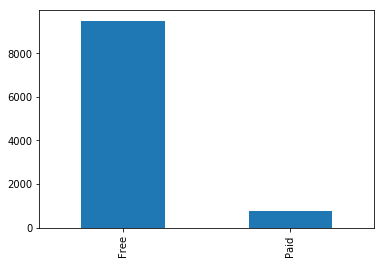

In [3]:
#查看特征的数值
raw_df['Type'].value_counts().plot(kind='bar')

**第二步 分类变量数值化**

Type数据只有两种可能数值，包括free和paid。因此我们可以用Label-Encoding将这一特征数据离散化。

In [4]:
#我们可以直接通过map实现分类变量的离散化
raw_df['Type'] = raw_df['Type'].map({'Free':1,"Paid":2})
raw_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,1,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,1,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,1,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,1,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,1,0.0,Everyone,Art & Design;Creativity


## 特征7：Content Rating

**第一步：查看特征信息及可视化。**

In [5]:
#查看特征的数值
raw_df['Content Rating'].value_counts()

Everyone           8305
Teen               1128
Mature 17+          445
Everyone 10+        359
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

内容分级数据中，有2个样本没有分级。我们可以单独查看一下这两个样本，观察是否为缺失值。

In [6]:
raw_df[raw_df['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
6743,Best CG Photography,FAMILY,4.3,1,2.5,500.0,1,0.0,Unrated,Entertainment
7691,DC Universe Online Map,TOOLS,4.1,1186,6.4,50000.0,1,0.0,Unrated,Tools


可以看出数据的第一条数据只有一条评论和一次下载，第二条数据只有9次下载却有1186条评论。因此我们可以将这两个没有分级的样本给删除。

In [7]:
raw_df = raw_df[raw_df['Content Rating'] !='Unrated']

In [8]:
#更新重置样本标签
raw_df.reset_index(drop= True,inplace = True)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

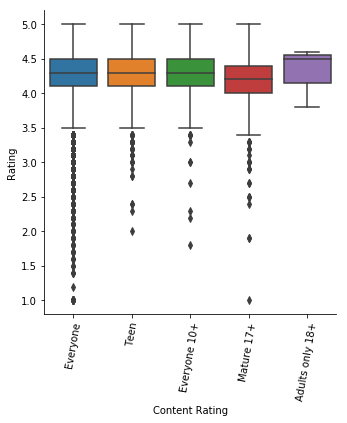

In [9]:
sns.catplot(x="Content Rating",y="Rating",data=raw_df, kind="box")
plt.xticks(rotation=80)

从箱型图中，每个内容分级的均值来看Adults only 18+的平均评分最高。Mature 17+的的平均评分最低。

**第二步 分类变量数值化**

内容分级这一特征三种取值不是完全独立的，根据限制的程度我们可以排序为Everyone，Everyone 10+，Teen，Mature 17+和Adults only 18。因此分级有高低是有序变量，这里用 LabelEncoder。

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#X = [['Everyone', 1], ['Teen', 2], ['Mature 17+',3]，['Everyone 10+', 4], ['Adults only 18+',5]]
#enc.fit(X)
raw_df['Content Rating'] = le.fit_transform(raw_df['Content Rating'])

#raw_df = pd.get_dummies(raw_df, columns= ["Content Rating"])

In [11]:
raw_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,1,0.0,1,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,1,0.0,1,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,1,0.0,1,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,1,0.0,4,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,1,0.0,1,Art & Design;Creativity


## 特征8：Category

**第一步：查看特征信息及可视化。**

In [12]:
raw_df["Category"].value_counts()

FAMILY                 1930
GAME                   1081
TOOLS                   835
BUSINESS                426
MEDICAL                 407
PRODUCTIVITY            406
PERSONALIZATION         387
LIFESTYLE               372
FINANCE                 358
SPORTS                  349
COMMUNICATION           348
PHOTOGRAPHY             318
HEALTH_AND_FITNESS      306
SOCIAL                  267
NEWS_AND_MAGAZINES      261
TRAVEL_AND_LOCAL        233
BOOKS_AND_REFERENCE     230
SHOPPING                223
DATING                  196
VIDEO_PLAYERS           172
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
EVENTS                   64
ART_AND_DESIGN           64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

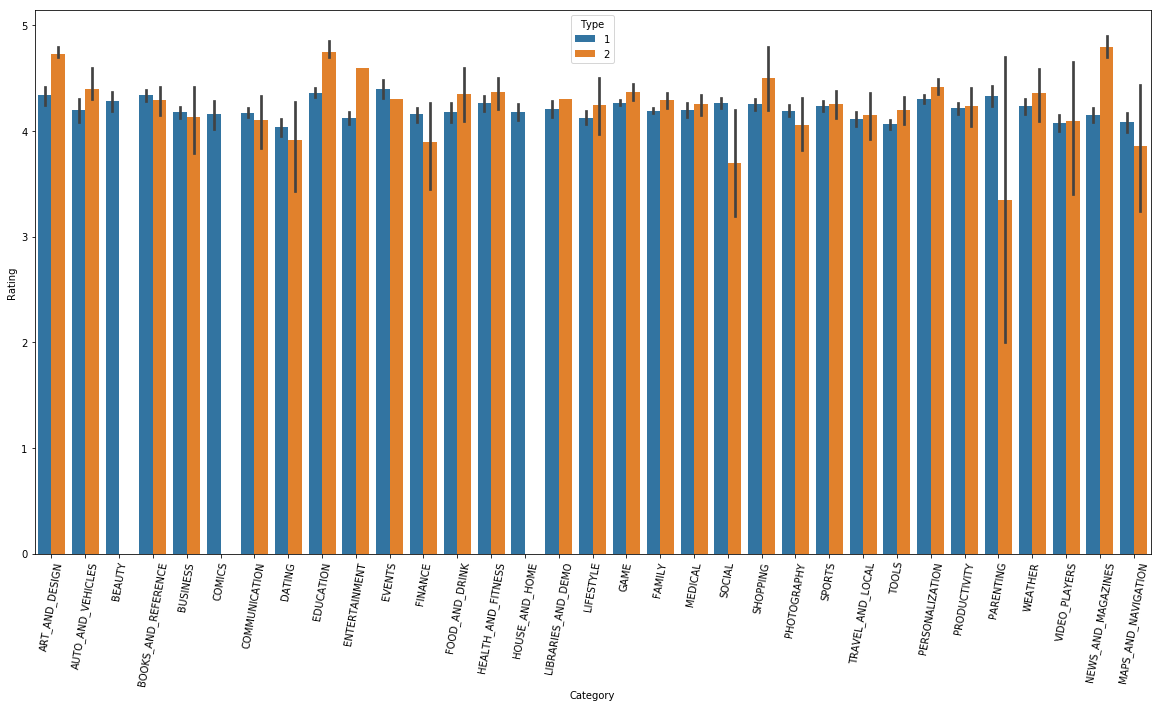

In [13]:
plt.figure(figsize=(20, 10))
sns.barplot(x="Category", y="Rating",hue="Type", data=raw_df)
plt.xticks(rotation=80)

对于art_and_design、education、entertainment和news_and_magnizeszz这几类来说，收费的APP的均分比较高。对于social和parenting来说，APP费用很可能会带来不好的评分。beauty、comics和house_and_home这三个类别的所有APP都是免费的。

**第二步 分类变量数值化**

### 问题1：经过上面的学习，对类别进行数值离散化，使用哪个方法更合理呢？
    .
    .
    .
    .
    .
    .
    .
    .
    .
    .

思路：类别数据是无序的。我们可以采用one-hot编码。one-hot编码的实现方式重要有两种。第一种是利用pandas中的get_dummy()实现；第二种是利用授课learn中的from sklearn.preprocessing import OneHotEncoder实现。由于pandas机制问题，它需要在内存中把数据集都读入进来，要是数据量大的话，太消耗资源，one-hot可以读数组，因此大规模数据集很方便。如果我们选用label-encoding，这样类别数据可能会出现顺序关系，可能会降低模型的精确度。我们选用独热码。

代码：

In [14]:
#用get_dummies()将Category转换为数值数据。
raw_df = pd.get_dummies(raw_df, columns= ["Category"])

In [15]:
raw_df.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_ART_AND_DESIGN,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.000000,10000.0,1,0.0,1,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14.000000,500000.0,1,0.0,1,Art & Design;Pretend Play,1,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.700000,5000000.0,1,0.0,1,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25.000000,50000000.0,1,0.0,4,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.800000,100000.0,1,0.0,1,Art & Design;Creativity,1,...,0,0,0,0,0,0,0,0,0,0
5,Paper flowers instructions,4.4,167,5.600000,50000.0,1,0.0,1,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
6,Smoke Effect Photo Maker - Smoke Editor,3.8,178,19.000000,50000.0,1,0.0,1,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
7,Infinite Painter,4.1,36815,29.000000,1000000.0,1,0.0,1,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
8,Garden Coloring Book,4.4,13791,33.000000,1000000.0,1,0.0,1,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
9,Kids Paint Free - Drawing Fun,4.7,121,3.100000,10000.0,1,0.0,1,Art & Design;Creativity,1,...,0,0,0,0,0,0,0,0,0,0


## 特征8：Genres

In [16]:
raw_df["Genres"].value_counts()

Tools                                  834
Entertainment                          587
Education                              525
Business                               426
Medical                                407
Productivity                           406
Personalization                        387
Lifestyle                              371
Finance                                358
Sports                                 354
Action                                 354
Communication                          348
Photography                            318
Health & Fitness                       306
Social                                 267
News & Magazines                       261
Travel & Local                         232
Books & Reference                      230
Shopping                               223
Arcade                                 213
Simulation                             199
Dating                                 196
Casual                                 173
Video Playe

从输出的类型数据我们可以看出，某些样本的类型数据，其实包含两个类型，比如Video Players & Editors;Creativity，Card;Action & Adventure和Books & Reference;Creativity 。分号前为主要的类型，分号后为次要的类型。有因Genres和Category这个特征表示的意思有重复的地方。这里我们只保留分号前的主要类型。

In [17]:
sep = ';'
raw_df['Genres']= raw_df['Genres'].apply(lambda x: x.split(sep)[0])
raw_df["Genres"].value_counts()

Tools                      835
Entertainment              627
Education                  608
Business                   426
Medical                    407
Productivity               406
Personalization            387
Lifestyle                  373
Action                     369
Finance                    358
Sports                     358
Communication              349
Photography                318
Health & Fitness           308
Social                     267
News & Magazines           261
Casual                     242
Books & Reference          233
Travel & Local             233
Arcade                     229
Shopping                   223
Simulation                 216
Dating                     196
Video Players & Editors    175
Puzzle                     162
Maps & Navigation          137
Food & Drink               124
Role Playing               120
Racing                     115
Educational                106
Strategy                   101
Adventure                   89
Auto & V

**第二步 分类变量数值化**

In [18]:
#用get_dummies()将Category转换为数值数据。
#raw_df = pd.get_dummies(raw_df, columns= ["Genres"])
raw_df['Genres'] = le.fit_transform(raw_df['Genres'])

In [19]:
raw_df.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_ART_AND_DESIGN,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000.0,1,0.0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14.0,500000.0,1,0.0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000.0,1,0.0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000.0,1,0.0,4,3,1,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000.0,1,0.0,1,3,1,...,0,0,0,0,0,0,0,0,0,0


这里APP的名字我们不做处理，直接删除。

In [20]:
raw_df = raw_df.drop(["App"],axis='columns')

In [21]:
#保存文件
raw_df.to_csv("AppDataV2.csv")